In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

In [2]:
data=pd.read_csv('use_case.csv')

In [3]:
data.head()

,Category1,Category2,Category3,10-Dec,11-Jan,11-Feb,11-Mar,11-Apr,11-May,11-Jun,...,16-Jun,16-Jul,16-Aug,16-Sep,16-Oct,16-Nov,16-Dec,17-Jan,17-Feb,17-Mar
0,A,X,W,0,0,0,0,0,0,0,...,31879,25246,27515,0,0,0,0,0,0,0
1,A,A,A,0,0,0,0,0,0,0,...,340386,275873,332474,0,0,0,0,0,0,0
2,A,A,B,0,0,0,0,0,0,0,...,297683,250246,292801,0,0,0,0,0,0,0
3,A,A,C,0,0,0,0,0,0,0,...,20951,17712,18621,0,0,0,0,0,0,0
4,A,A,E,0,0,0,0,0,0,0,...,1032063,821724,986055,0,0,0,0,0,0,0


## Data Wrangling

In [4]:
data.shape

(94, 79)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 79 columns):
Category1    94 non-null object
Category2    94 non-null object
Category3    81 non-null object
10-Dec       94 non-null int64
11-Jan       94 non-null int64
11-Feb       94 non-null int64
11-Mar       94 non-null int64
11-Apr       94 non-null int64
11-May       94 non-null int64
11-Jun       94 non-null int64
11-Jul       94 non-null int64
11-Aug       94 non-null int64
11-Sep       94 non-null int64
11-Oct       94 non-null int64
11-Nov       94 non-null int64
11-Dec       94 non-null int64
12-Jan       94 non-null int64
12-Feb       94 non-null int64
12-Mar       94 non-null int64
12-Apr       94 non-null int64
12-May       94 non-null int64
12-Jun       94 non-null int64
12-Jul       94 non-null int64
12-Aug       94 non-null int64
12-Sep       94 non-null int64
12-Oct       94 non-null int64
12-Nov       94 non-null int64
12-Dec       94 non-null int64
13-Jan       94 non-null i

In [6]:
print('Missing value or zero percentage per column')
((data.isnull())|(data==0)).sum()/len(data)

Missing value or zero percentage per column


Category1    0.000000
Category2    0.000000
Category3    0.138298
10-Dec       0.978723
11-Jan       0.978723
11-Feb       0.978723
11-Mar       0.978723
11-Apr       0.978723
11-May       0.978723
11-Jun       0.978723
11-Jul       0.978723
11-Aug       0.978723
11-Sep       0.978723
11-Oct       0.978723
11-Nov       0.978723
11-Dec       0.978723
12-Jan       0.978723
12-Feb       0.978723
12-Mar       0.978723
12-Apr       0.978723
12-May       0.978723
12-Jun       0.978723
12-Jul       0.978723
12-Aug       0.978723
12-Sep       0.978723
12-Oct       0.978723
12-Nov       0.978723
12-Dec       0.978723
13-Jan       0.021277
13-Feb       0.010638
               ...   
14-Oct       0.042553
14-Nov       0.042553
14-Dec       0.021277
15-Jan       0.042553
15-Feb       0.042553
15-Mar       0.042553
15-Apr       0.031915
15-May       0.042553
15-Jun       0.042553
15-Jul       0.031915
15-Aug       0.042553
15-Sep       0.031915
15-Oct       0.031915
15-Nov       0.031915
15-Dec    

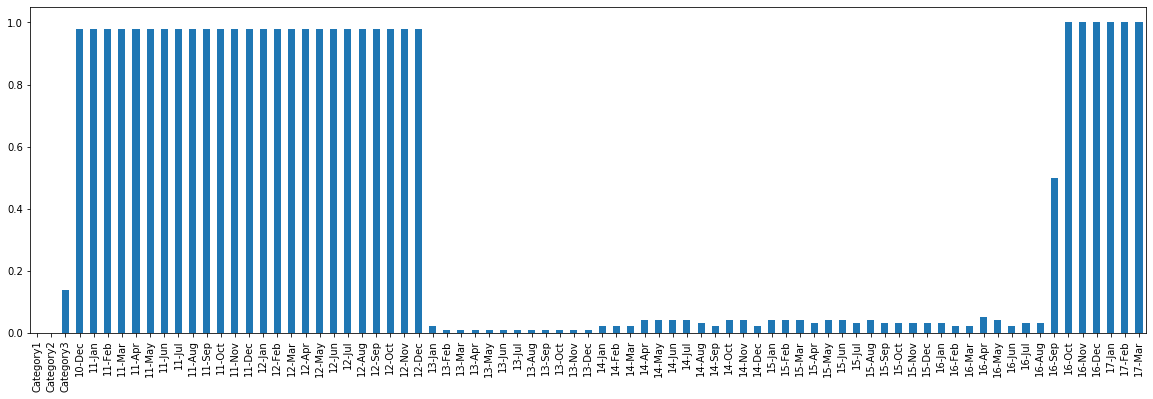

In [7]:
plt.figure(figsize=(20,6))
(((data.isnull())|(data==0)).sum()/len(data)).plot.bar()

We are interested in measuring total sales of this company. Each Date column has some 0s or missing values. According to this plot, I decided to remove those columns with more than 20% 0s or missing values.

In [8]:
## remove columns with more than 20% missing value or zero
missing_cols=((data.isnull())|(data==0)).sum()/len(data)>0.2
data_new=data[data.columns[missing_cols==False]] #wanna keep that columns with 30%

In [9]:
data_new.head()

,Category1,Category2,Category3,13-Jan,13-Feb,13-Mar,13-Apr,13-May,13-Jun,13-Jul,...,15-Nov,15-Dec,16-Jan,16-Feb,16-Mar,16-Apr,16-May,16-Jun,16-Jul,16-Aug
0,A,X,W,0,0,0,0,0,0,0,...,27470,57135,24230,22576,25627,21283,21486,31879,25246,27515
1,A,A,A,445387,409590,446587,313901,294959,371677,311436,...,337553,679924,289284,319954,351710,253872,261584,340386,275873,332474
2,A,A,B,734161,685919,789018,509878,488771,640080,466612,...,366460,715109,305632,315760,369734,261899,239278,297683,250246,292801
3,A,A,C,35450,32177,40849,25757,27031,39493,30014,...,25321,48449,20415,23348,27214,18392,23174,20951,17712,18621
4,A,A,E,1246672,1107478,1241805,1018131,873597,1039250,848263,...,832857,1118580,1039288,951418,1069458,778416,750565,1032063,821724,986055


In [10]:
data_new.shape

(94, 47)

In [11]:
((data_new.isnull())|(data_new==0)).sum()/len(data_new)

Category1    0.000000
Category2    0.000000
Category3    0.138298
13-Jan       0.021277
13-Feb       0.010638
13-Mar       0.010638
13-Apr       0.010638
13-May       0.010638
13-Jun       0.010638
13-Jul       0.010638
13-Aug       0.010638
13-Sep       0.010638
13-Oct       0.010638
13-Nov       0.010638
13-Dec       0.010638
14-Jan       0.021277
14-Feb       0.021277
14-Mar       0.021277
14-Apr       0.042553
14-May       0.042553
14-Jun       0.042553
14-Jul       0.042553
14-Aug       0.031915
14-Sep       0.021277
14-Oct       0.042553
14-Nov       0.042553
14-Dec       0.021277
15-Jan       0.042553
15-Feb       0.042553
15-Mar       0.042553
15-Apr       0.031915
15-May       0.042553
15-Jun       0.042553
15-Jul       0.031915
15-Aug       0.042553
15-Sep       0.031915
15-Oct       0.031915
15-Nov       0.031915
15-Dec       0.031915
16-Jan       0.031915
16-Feb       0.021277
16-Mar       0.021277
16-Apr       0.053191
16-May       0.042553
16-Jun       0.021277
16-Jul    

In [12]:
data_new.head()

,Category1,Category2,Category3,13-Jan,13-Feb,13-Mar,13-Apr,13-May,13-Jun,13-Jul,...,15-Nov,15-Dec,16-Jan,16-Feb,16-Mar,16-Apr,16-May,16-Jun,16-Jul,16-Aug
0,A,X,W,0,0,0,0,0,0,0,...,27470,57135,24230,22576,25627,21283,21486,31879,25246,27515
1,A,A,A,445387,409590,446587,313901,294959,371677,311436,...,337553,679924,289284,319954,351710,253872,261584,340386,275873,332474
2,A,A,B,734161,685919,789018,509878,488771,640080,466612,...,366460,715109,305632,315760,369734,261899,239278,297683,250246,292801
3,A,A,C,35450,32177,40849,25757,27031,39493,30014,...,25321,48449,20415,23348,27214,18392,23174,20951,17712,18621
4,A,A,E,1246672,1107478,1241805,1018131,873597,1039250,848263,...,832857,1118580,1039288,951418,1069458,778416,750565,1032063,821724,986055


Some rows have constant zeros over time. It could be possible that product was just launched (zeros at the beginning) or withdraw (constant zeros at recent time). So I keep them as what they are.

## Data Exploration

In [13]:
data_new.head()

,Category1,Category2,Category3,13-Jan,13-Feb,13-Mar,13-Apr,13-May,13-Jun,13-Jul,...,15-Nov,15-Dec,16-Jan,16-Feb,16-Mar,16-Apr,16-May,16-Jun,16-Jul,16-Aug
0,A,X,W,0,0,0,0,0,0,0,...,27470,57135,24230,22576,25627,21283,21486,31879,25246,27515
1,A,A,A,445387,409590,446587,313901,294959,371677,311436,...,337553,679924,289284,319954,351710,253872,261584,340386,275873,332474
2,A,A,B,734161,685919,789018,509878,488771,640080,466612,...,366460,715109,305632,315760,369734,261899,239278,297683,250246,292801
3,A,A,C,35450,32177,40849,25757,27031,39493,30014,...,25321,48449,20415,23348,27214,18392,23174,20951,17712,18621
4,A,A,E,1246672,1107478,1241805,1018131,873597,1039250,848263,...,832857,1118580,1039288,951418,1069458,778416,750565,1032063,821724,986055


In [14]:
cols=['13-Jan', '13-Feb', '13-Mar',
       '13-Apr', '13-May', '13-Jun', '13-Jul', '13-Aug', '13-Sep', '13-Oct',
       '13-Nov', '13-Dec', '14-Jan', '14-Feb', '14-Mar', '14-Apr', '14-May',
       '14-Jun', '14-Jul', '14-Aug', '14-Sep', '14-Oct', '14-Nov', '14-Dec',
       '15-Jan', '15-Feb', '15-Mar', '15-Apr', '15-May', '15-Jun', '15-Jul',
       '15-Aug', '15-Sep', '15-Oct', '15-Nov', '15-Dec', '16-Jan', '16-Feb',
       '16-Mar', '16-Apr', '16-May', '16-Jun', '16-Jul', '16-Aug']
df_melt=pd.melt(data_new,id_vars=['Category1','Category2','Category3'],value_vars=cols,value_name='Sales',var_name='Date')
df_melt.Date=pd.to_datetime(df_melt.Date, format='%y-%b')
df_melt.head()

,Category1,Category2,Category3,Date,Sales
0,A,X,W,2013-01-01,0
1,A,A,A,2013-01-01,445387
2,A,A,B,2013-01-01,734161
3,A,A,C,2013-01-01,35450
4,A,A,E,2013-01-01,1246672


In [15]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4136 entries, 0 to 4135
Data columns (total 5 columns):
Category1    4136 non-null object
Category2    4136 non-null object
Category3    3564 non-null object
Date         4136 non-null datetime64[ns]
Sales        4136 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 161.6+ KB


In [16]:
#df_melt.to_csv('melt data.csv') for tableau

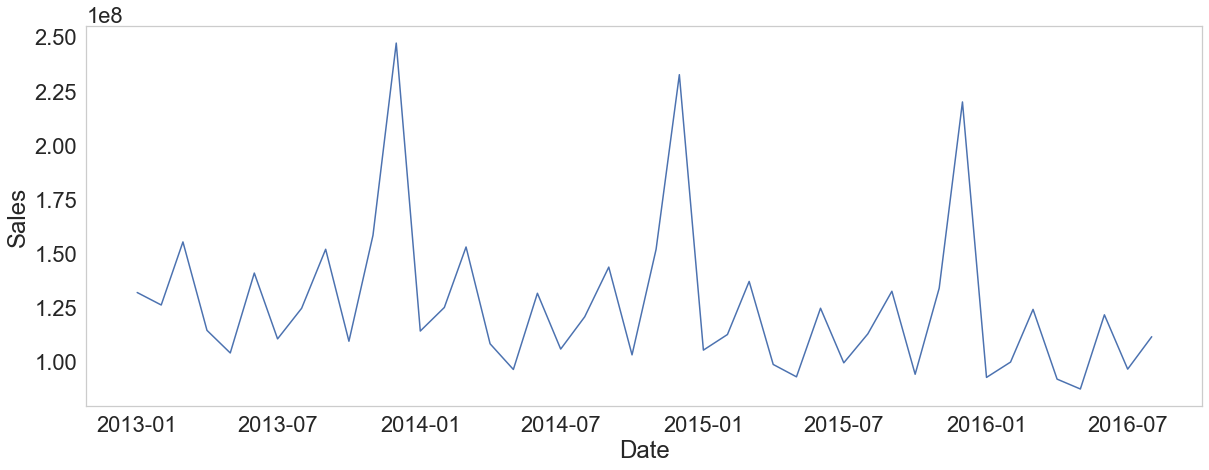

In [17]:
sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(20,7))
sns.lineplot(x="Date", y="Sales",
             data=df_melt,ci=None,estimator='sum')

plt.show()

In [18]:
df_melt.groupby(df_melt.Date.dt.year).sum().pct_change()

,Sales
Date,
2013,NaN
2014,-0.052898
2015,-0.076862
2016,-0.436036


The yearly growth rate of total sales is -0.052898 in 2014 and -0.076862 in 2015.

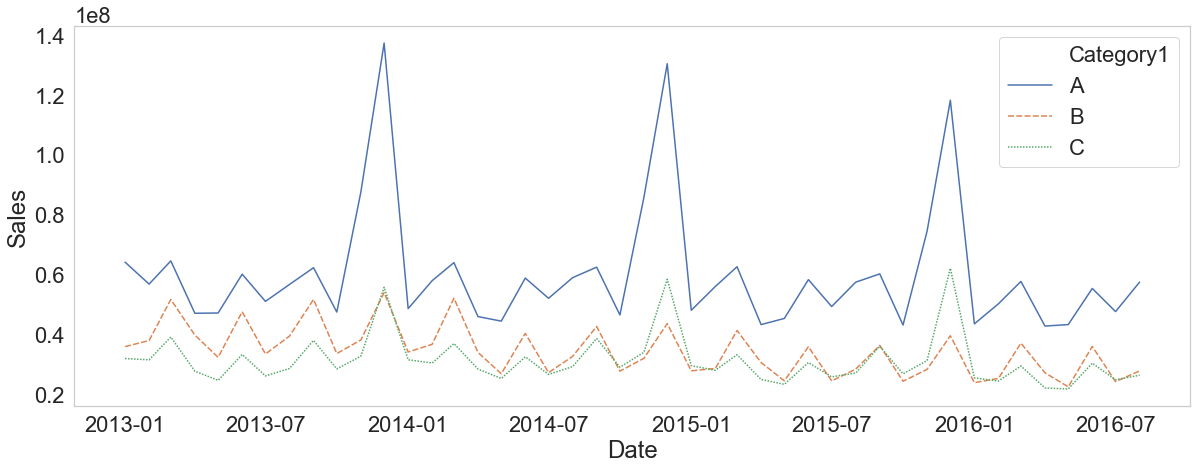

In [19]:
sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(20,7))
sns.lineplot(x="Date", y="Sales",
             hue="Category1",
             data=df_melt,ci=None,style='Category1',estimator='sum')

plt.show()


### Category1/A

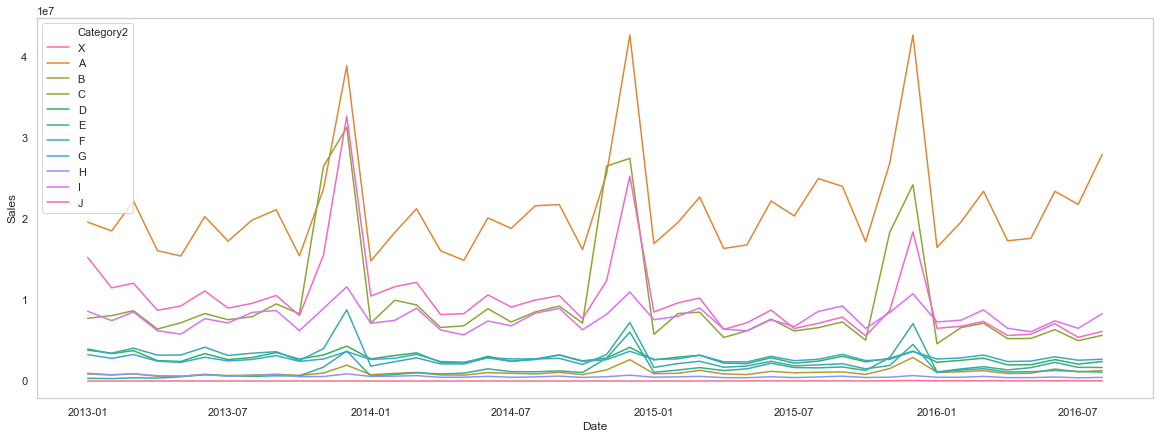

In [20]:
sns.set(font_scale = 1)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(20,7))
sns.lineplot(x="Date", y="Sales",
             hue="Category2",
             data=df_melt[df_melt.Category1=='A'],ci=None,estimator='sum')

plt.show()

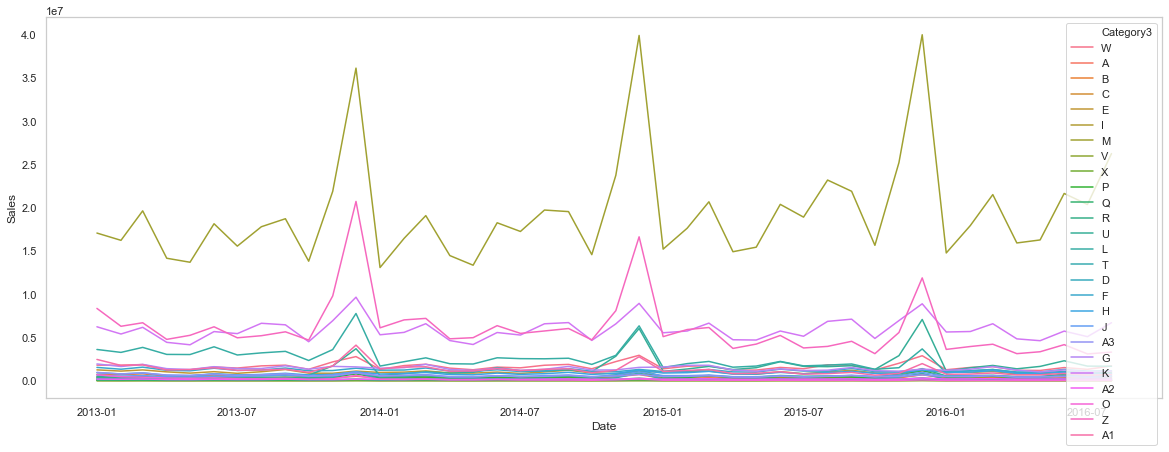

In [21]:
sns.set(font_scale = 1)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(20,7))
sns.lineplot(x="Date", y="Sales",
             hue="Category3",
             data=df_melt[df_melt.Category1=='A'],ci=None,estimator='sum')

plt.show()

### Category1/B

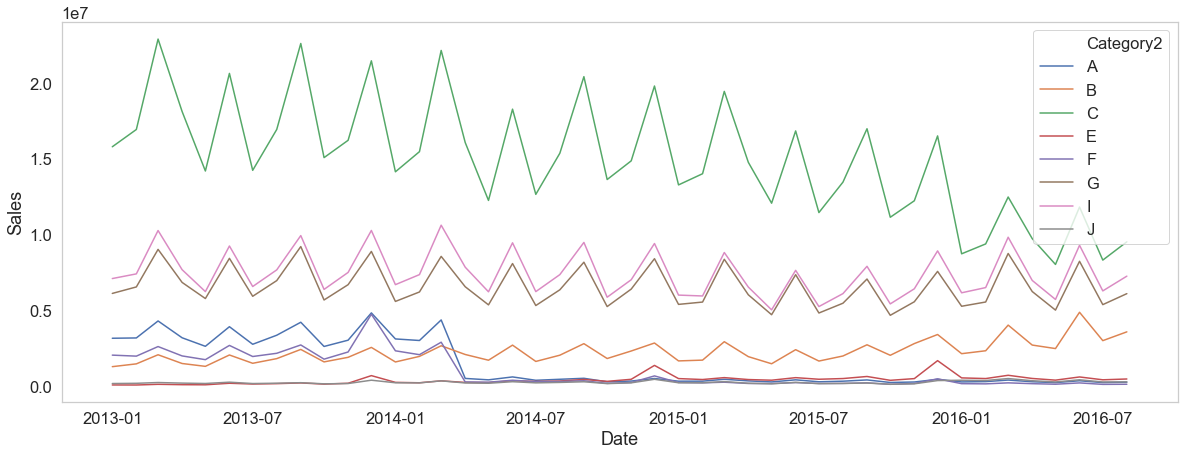

In [22]:
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(20,7))
sns.lineplot(x="Date", y="Sales",
             hue="Category2",
             data=df_melt[df_melt.Category1=='B'],ci=None,estimator='sum')

plt.show()

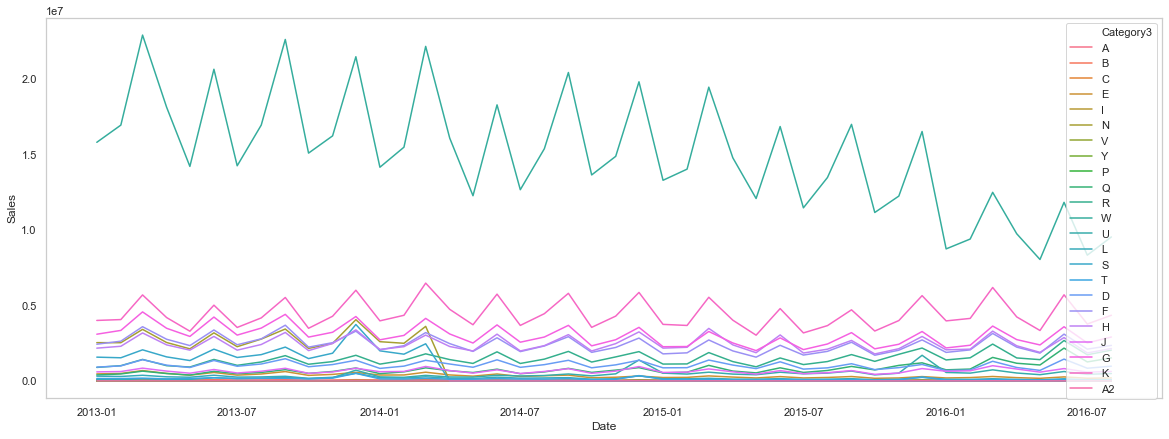

In [23]:
sns.set(font_scale = 1)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(20,7))
sns.lineplot(x="Date", y="Sales",
             hue="Category3",
             data=df_melt[df_melt.Category1=='B'],ci=None,estimator='sum')

plt.show()

### Category1/C

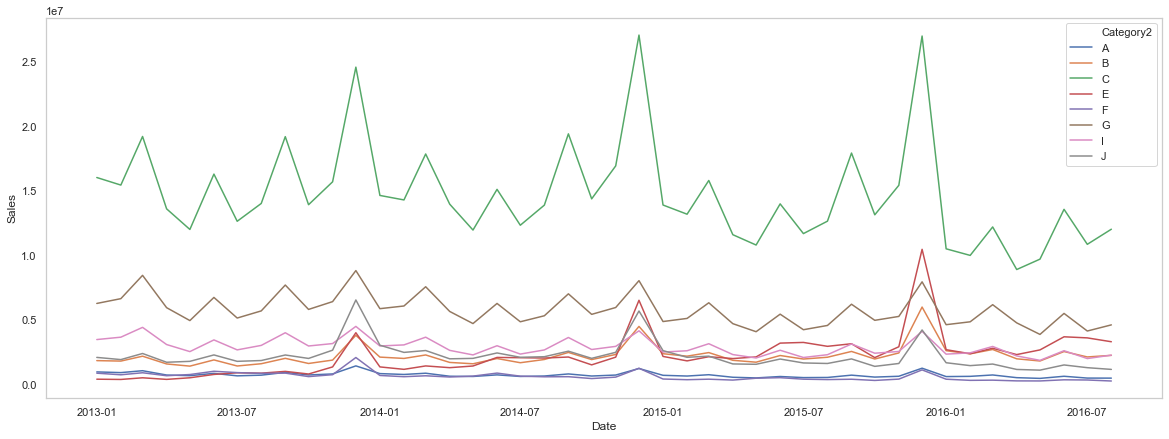

In [24]:
sns.set(font_scale = 1)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(20,7))
sns.lineplot(x="Date", y="Sales",
             hue="Category2",
             data=df_melt[df_melt.Category1=='C'],ci=None,estimator='sum')

plt.show()

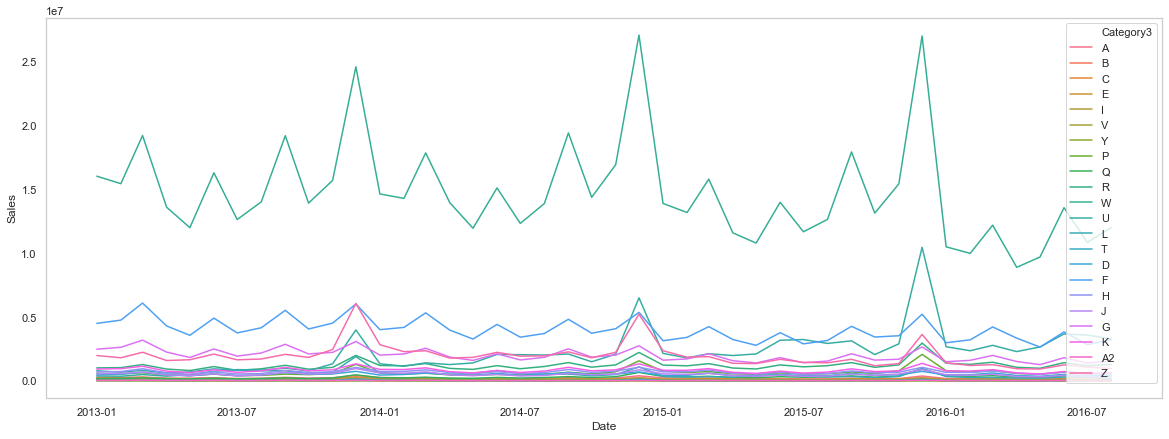

In [25]:
sns.set(font_scale = 1)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(20,7))
sns.lineplot(x="Date", y="Sales",
             hue="Category3",
             data=df_melt[df_melt.Category1=='C'],ci=None,estimator='sum')

plt.show()

Compared to Category1/A and Category1/C, Category1/B has obvious downward trend. To be more specific, in Catgory1/B, sales of products under Category2/C or Category3/W undergo huge drop, dragging down the total sales.

In [26]:
df_melt.head()

,Category1,Category2,Category3,Date,Sales
0,A,X,W,2013-01-01,0
1,A,A,A,2013-01-01,445387
2,A,A,B,2013-01-01,734161
3,A,A,C,2013-01-01,35450
4,A,A,E,2013-01-01,1246672


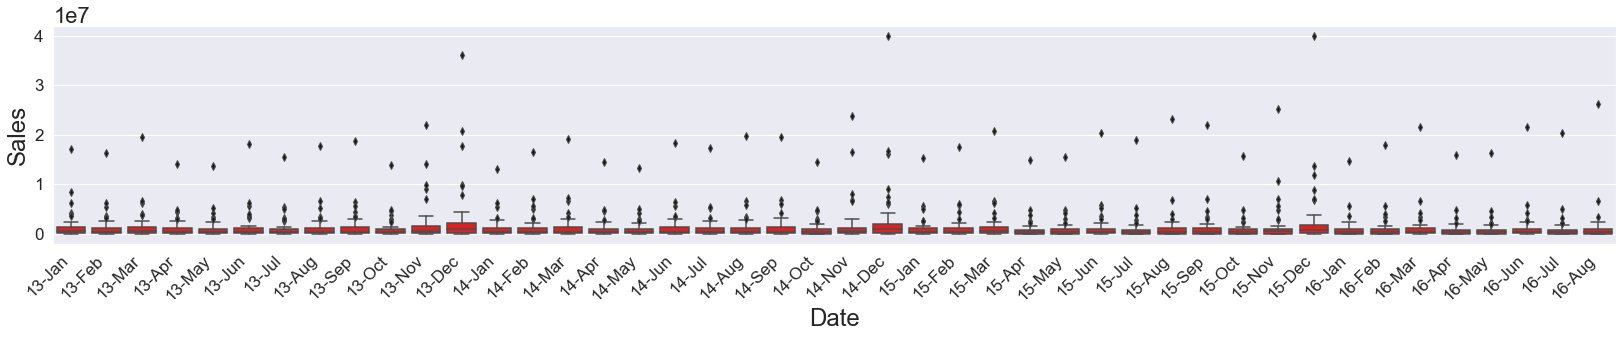

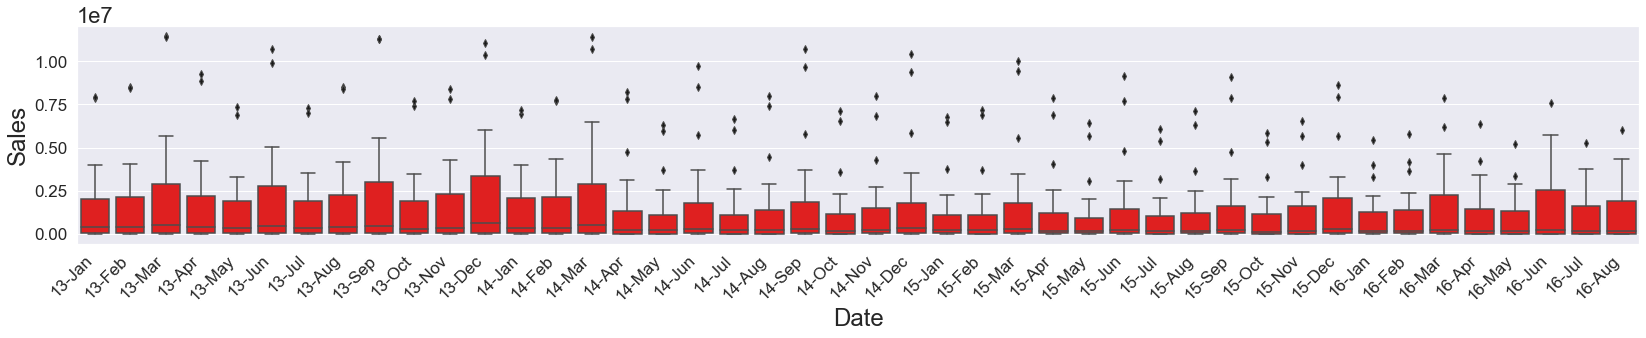

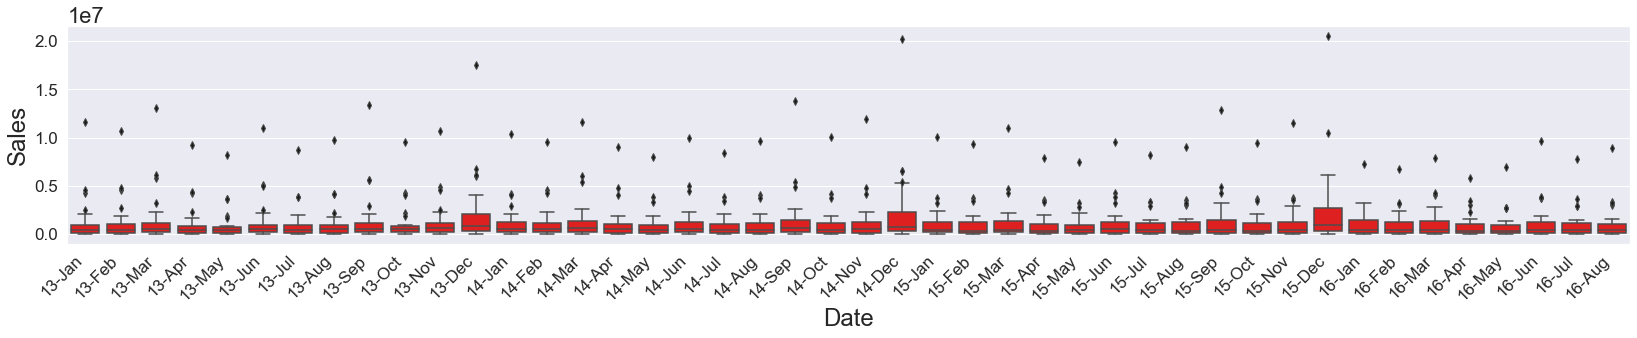

In [27]:
sns.set_style("whitegrid", {'axes.grid' : False})
for i in data_new.Category1.unique():
    df_temp=data_new[data_new.Category1==i]
    df_temp=pd.melt(df_temp,value_vars=cols,value_name='Sales',var_name='Date')
    sns.set(font_scale = 2)
    plt.figure(figsize=(28,4))
    ax=sns.boxplot(
        data=df_temp,
        x='Date',
        y='Sales',
        color='red',flierprops = dict(markerfacecolor = '0.10', markersize = 5))#,whis=2.5)
    ax.set_xticklabels(labels=df_temp['Date'].unique(), rotation=45, ha='right',)
    ax.tick_params(axis='both', which='major', labelsize=17)
    plt.show()

In [28]:
actual=[21483559 ,15900085 ,16247858, 21614813, 20341383 ,26216774]
pred=[20968087, 15292669, 15809611, 20676744, 19224662 ,23439429]

In [31]:
import sklearn
from sklearn.metrics import mean_squared_error
import math
mse = sklearn.metrics.mean_squared_error(actual, pred)
rmse = math.sqrt(mse)
print(rmse)

1333379.822260959
